Total counts for qubit states are: {'010011': 1, '011111': 1, '010100': 1, '010000': 3, '111110': 1, '010010': 2, '000100': 2, '001111': 4, '110001': 1, '001011': 669, '000011': 1, '000111': 6, '001101': 11, '000000': 1, '111100': 1, '001010': 194, '001100': 31, '110011': 1, '101111': 1, '000110': 3, '001000': 11, '000010': 2, '001110': 7, '110100': 1, '001001': 35, '000101': 2, '010001': 6, '100011': 1}


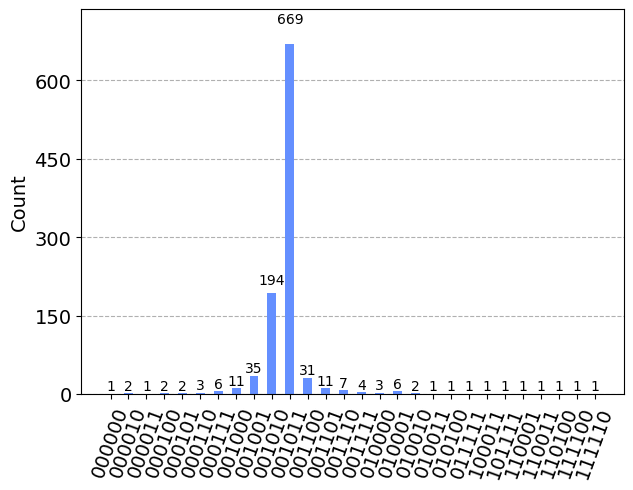

The estimated phase is: 0.171875


In [3]:
#Exercise7-3 設計量子程式透過量子相位估測，以 6 個計數位元的測量結果推導出帶 𝜋 /3 參數么正變換 P 閘本徵值對應的相位
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

def iqft(n):
    #逆進行量子傅立葉變換
    br = QuantumRegister(n,'b')
    qc = QuantumCircuit(br)
    for sbit in range(n//2):
        qc.swap(sbit,n-sbit-1)#添加swap
    for hbit in range(0,n,1):
        for cbit in range(hbit-1,-1,-1):
            qc.cp(-pi/2**(hbit-cbit),cbit,hbit)#添加control p閘
        qc.h(hbit)#添加h閘
    return qc


#P(pi/3)，為繞著Z軸旋轉，會形成相位回擊
count_number = 6 #計數位元
count_register = QuantumRegister(count_number,'count')
psireg = QuantumRegister(1,'psi')
creg = ClassicalRegister(count_number,'c')
qc = QuantumCircuit(count_register,psireg,creg)
for i in range(count_number):
    qc.h(i)
qc.x(psireg) #需指向|1>才能使用

#添加受控T閘(P(pi/3))：
for bit in range(count_number):
    for time in range(2**bit):
        qc.cp(pi/3,psireg,bit)#旋轉2的位元次方之次數
qc.barrier()
qc.append(iqft(count_number).to_gate(label='IQFT'),count_register)#對count進行逆量子傅立葉變換
qc.barrier()
qc.measure(count_register,creg)

#進行模擬
sim = AerSimulator()
job = execute(qc,backend=sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)
display(plot_histogram(counts))
max_value = max(counts,key=counts.get) #得到出現最多次的值
phase = int(max_value,base=2)/2**count_number #將最大值轉為十進制，且(phase)*(2^count_number) = max_value
print("The estimated phase is:",phase)